# What are the top 5 potential cryptocurrencies related to Metaverse? What is their weakness and strengths that helps investors to understand before investing on them?

To identify top 5 metaverse, we identify the market capitalization (Cryptoasset) for selection. 

Market capitalization of the cryptoasset is calculated by multiplying the existing price of cryptoasset by the current circulating supply. Let's take the market capitalization of Bitcoin as an example:

Let (C) be the last known reference price of Bitcoin from CoinMarketCap in USD.
Let (S) be the current circulating supply of Bitcoin.
Let (D) be the derived market capitalization for Bitcoin.
For this example, let(C) = 10,000USD/1BTC and let(S) = 17,000,000BTC.

1. D = C * S 
2. D = 10,000USD/1BTC * 17,000,000 
3. BTC = 170,000,000,000 USD.

Therefore, the derived market capitalization for Bitcoin is 170,000,000,000 USD.

In this research, we leverage the CoinMarketCap's API to get the necessary information. 


In additional to evaluate whether the coin is consider into the requirements. 
The following steps will be use to evaluate the Metaverse's coin.
- Trading Volume & Liquidity
- Circulating Supply vs Total Supply

## Trading volume & liquidity
The trade volume statistic measures how much is bought and sold over time and is a critical metric. Liquidity is a metric that indicates how easy a crypto asset can be bought or sold, which is critical since it enables you to buy and sell whenever you want, which is especially significant when considering low volume projects where you may not be able to sell out at your desired time. A low trading volume for a medium-cap project may also indicate that the project has been abandoned, lacks a real-world use case, or has a limited community, all of which are red flags.


## Circulating Supply vs Total Supply
Additionally, it is critical to distinguish between circulating and total supply for a project. The circulating supply is the quantity of coins/tokens currently in circulation, whereas the total supply is the maximum possible quantity of coins/tokens. The circulating supply is the number of coins available to the public and should not be confused with the total supply or maximum supply. The total supply is used to determine the total number of coins in existence, i.e., the total number of coins issued minus the total number of coins burned. The total supply is essentially equal to the sum of the circulating supply and the coins in escrow. Escrow mean like staking, farming, or those held by founders or early investors that are restricted from sale for a period of time (locked).

When measuring the circulating supply and total supply of the project, Bitcoin serves as an excellent reference point. There are only 21 million Bitcoins available in total, with approximately 19 million now in circulation.

When compared to a project such as XRP, which has a total supply of 100 billion and a circulating supply of approximately 47 million, the scarcity of Bitcoin coins is obvious (thus the higher value for one Bitcoin). Additionally, in circumstances where the total supply is many orders of magnitude greater, a significant increase in the circulating supply can rapidly debase the price.

## Other than that, CoinMarketCap API provided FCAS
FCAS stands for Fundamental Crypto Asset Score, a single consistently comparable value for measuring crypto project health. FCAS measures users activity, developer behavior and market maturity.

Code below is to extract the trading volume, liquidity, circulating supply and total supply and FCAS result for further analysis the top 5 crypto

Base on Coinmarketcap's API, we has been identified top 5 of the marketplace in April 2022. 

Before we select the top 5 Metaverse's related coin. We have to understand how we select and explore whether fulfill our requirements. 

1. Coinmarketcap provided API that could help to filter metaverse related coins. Below script able to fulfill to extract the information to identify the metaverse related coins. 
2. Then, we have to explore as much as meet the crypto price that available since Jan 2021 to May 2022 for us to further explore the data analysis.

In [1]:
import json
import pandas as pd
#!pip install pandas_datareader to validate crypto pricing with specific date
import pandas_datareader as web
import datetime as dt
from datetime import date
import seaborn as sns
from numerize import numerize
import matplotlib.patches as patches
import matplotlib.pyplot as plt

In [2]:
#connect CoinMarketCap API with the secret key to explore the crypto information
from coinmarketcapapi import CoinMarketCapAPI, CoinMarketCapAPIError
cmc = CoinMarketCapAPI('0b64c586-80f4-490e-86bb-fe88a97df34e')

In [3]:
#to retrieve categories of crypto from CoinMarketCap
categories = cmc.cryptocurrency_categories()

In [4]:
#convert the data to json format and after that assign to dataframe
jsondata = json.loads(repr(categories.data).replace("\'", "\""))
CoinDF = pd.json_normalize(jsondata)

In [5]:
#filter and get metaverse id in order for retrieve the crypto information. 
metaverseDF = pd.DataFrame(CoinDF, columns = ["id", "name"])
metaverseID = metaverseDF[metaverseDF['name']=='Metaverse']

In [6]:
#filter only metaverse coins for further analysis
category = cmc.cryptocurrency_category(id=metaverseID.id)

In [7]:
#retrieve grade and score for specific coins info. 
#If the coins doesn't provided by the third party evaluation, result return None.
def get_fcas(slug):
    try:
        fcas = cmc.partners_flipsidecrypto_fcas_quotes_latest(slug=slug)
        fcas_data = fcas.data
        score = list(fcas_data.values())[0]["score"]
        grade = list(fcas_data.values())[0]["grade"]
        return score, grade
    except Exception as e:
        score = 0
        grade = 'No Grade'
        return score, grade

In [8]:
fieldnames = ['Name', 'Symbol', 'Rank','Market Cap Dominance','Market Cap',
              'Price', 'Circulating Supply', 'Total Supply', 'Max Supply', 'Volume (24h)', 'Date Added', 
              'Score', 'Grade','Last Updated']
coins_result = pd.DataFrame()
for coin in category.data['coins']:
    
    score, grade = get_fcas(coin['slug'])
    
    values = [(coin['name'], coin['symbol'], coin['cmc_rank'], coin['quote']['USD']['market_cap_dominance'],
              coin['quote']['USD']['market_cap'],coin['quote']['USD']['price'],coin['circulating_supply'],
              coin['total_supply'], coin['max_supply'], coin['quote']['USD']['volume_24h'],coin['date_added'],score, grade,
              coin['quote']['USD']['last_updated'])]
    
    #Create a DataFrame object
    item = pd.DataFrame(values, 
                    columns = fieldnames)
    coins_result=pd.concat([coins_result, item], ignore_index = True, axis = 0)


In [9]:
#verify data
print(coins_result.head())

            Name Symbol Rank  Market Cap Dominance    Market Cap      Price  \
0        ApeCoin    APE   32                0.1733  2.170125e+09   7.427165   
1   Decentraland   MANA   36                0.1492  1.868682e+09   1.013339   
2  Axie Infinity    AXS   47                0.1008  1.263072e+09  20.737548   
3  Theta Network  THETA   48                0.0985  1.233948e+09   1.233948   
4         Stacks    STX   66                0.0602  7.541685e+08   0.573594   

   Circulating Supply  Total Supply  Max Supply  Volume (24h)  \
0        2.921875e+08  1.000000e+09  1000000000  5.942704e+08   
1        1.844083e+09  2.193662e+09        None  2.725197e+08   
2        6.090750e+07  2.700000e+08   270000000  1.977398e+08   
3        1.000000e+09  1.000000e+09  1000000000  8.462221e+07   
4        1.314813e+09  1.352465e+09  1818000000  5.135852e+07   

                 Date Added  Score     Grade              Last Updated  
0  2022-03-17T12:26:36.000Z      0  No Grade  2022-05-24T13:3

## Filter the records to fulfill the requirements

1. Verify the date whether is in between the research scope - our first condition is to find the coin that have data start from 1st Jan 2021 to 1st May 2022 

In [10]:
start = dt.datetime(2021,1,1)
end = dt.datetime(2022,4,23)

#get total of day
delta = end - start
print('Total day of start and end date delta is: {0}'.format(delta))

Total day of start and end date delta is: 477 days, 0:00:00


In [11]:
def filter_coin_matchdate(start, end, result):
    #convert string to datetime
    #result['Date Added'] = pd.to_datetime(result['Date Added'])
    result['Date Added'] = result['Date Added'].apply(lambda x: pd.to_datetime(x, unit="ns", utc=True).floor('D'))
    start = pd.to_datetime(start, unit="ns", utc=True).floor('D')
    end = pd.to_datetime(end, unit="ns", utc=True).floor('D')
    #print('start: {0}, end: {1}, compare_date: {2}'.format(start, end, result['Date Added']))
    mask = (result['Date Added'] < start) & (result['Date Added'] <= end)
    result = result.loc[mask]
    return result

In [12]:
coins_result_btw_date_accepted = filter_coin_matchdate(start,end,coins_result)

2. Filter top 5 market cap coins

In [13]:
def filter_top_5(coins_result):
    top_5_mask = coins_result.nlargest(n=5, columns=['Market Cap'], keep='all')
    return top_5_mask

top_5_coins_result = filter_top_5(coins_result_btw_date_accepted)

In [14]:
def is_valid_num(num):
    if num == None:
        return None
    else:
        return numerize.numerize(int(num))

In [15]:
#convert to numerize for easier to read
top_5_coins_result['Market Cap Numerize'] = top_5_coins_result['Market Cap'].apply(lambda x: numerize.numerize(x))
top_5_coins_result['Circulating Supply Numerize'] = top_5_coins_result['Circulating Supply'].apply(lambda x: numerize.numerize(x))
top_5_coins_result['Total Supply Numerize'] = top_5_coins_result['Total Supply'].apply(lambda x: numerize.numerize(x))
top_5_coins_result['Max Supply Numerize'] = top_5_coins_result['Max Supply'].apply(lambda x: is_valid_num(x))
top_5_coins_result['Volume (24h) Numerize'] = top_5_coins_result['Volume (24h)'].apply(lambda x: numerize.numerize(x))

In [16]:
#top_5_coins_result reorder columns
top_5_result = top_5_coins_result[['Name','Symbol','Rank','Market Cap Dominance',
                                  'Market Cap Numerize', 'Price','Circulating Supply Numerize',
                                  'Total Supply Numerize','Max Supply Numerize', 'Volume (24h) Numerize',
                                  'Date Added', 'Score','Grade', 'Last Updated']]
#coloum rename
top_5_result = top_5_result.rename({'Market Cap Numerize':'Market Cap', 
                                    'Circulating Supply Numerize':'Circulating Supply',
                                    'Total Supply Numerize':'Total Supply',
                                    'Max Supply Numerize':'Max Supply',
                                    'Volume (24h) Numerize':'Volume (24h)'}, axis=1)

In [17]:
top_5_result["Last Updated"] = top_5_result["Last Updated"].apply(lambda x: pd.to_datetime(x, unit="ns", utc=True).floor('D').date())

In the table above shown the latest update by 25 Apr 2022.
Based on the ranking of MANA, SAND, THETA, AXS and STX are 35, 40, 46, 64 respectively. Which is consider quit high among many coins in the market.

Look into FCAS, only Decentraland, Theta Network and Stacks being evaluated. There are score 899, 486 and 760 with grade A, F, A respectively. The Sandbox and Axie Infinity does not provide the score and grade. However, we still could further evaluate base on other ways. Is doesn't mean without FCAS score and grade the coin is bad. 

## Understand max supply  
Notice that, Decentraland max supply is unlimited and other coins can the limited supply. Decentraland, with no limit. This MANA coins is burned or spent in exchange for LAND parcels. What is the pro and con with max supply of the coin created? 

### Advantages
Inflation has eroded the value of numerous currencies over time. Almost every cryptocurrency is released with a fixed amount at the time of its launch. The source code of each coin specifies its quantity; for example, there are only 21 million Bitcoins released worldwide. Thus, as demand grows, its value will rise, keeping pace with the market and, in the long run, preventing inflation. 

### Disadvantages
Like Ethereum, they is no fixed limit. Which mean, Ethereum have the potential to be inflationary. As is the case with Ethereum, there is no fixed limit. This would be to say, Ethereum has the potential to inflate. To avoid inflation, the amount 'burned' or 'lost' is determined.





## Circulate Supply vs Total Supply

Circulating supply is importance metric for us to evaluate. Like explain early, circulating supply refers to the total number of an asset's crypto that are publicly tradable via exchanges (CEX or DEX) at a given time. Generally used to calculate market capitalization given these crypto are those that reflect market demand most directly. 

In this case, Decentraland, The Sandbox and Theta Network provided quite hurge amount of circulate supply. Decentraland larger than the other 4. Decentraland have 1.84B follow by Stacks 1.41B, The Sandbox 1.16B, Theta Network 1B and Axie Infinity 60.91M. Low circulate supply might also easier to influence the price. If the demand increase, the price will go up even higher.  

From each of their whitepaper mentioned in tokenomics. Decentraland, The Sandbox, and Stacks only have one token to contribute into the tokenomics whether Axie infinity have Smooth Love Potion (SLP), Theta Network have TFuel that use for payment transaction. 

Obviously, Axie infinity price is higher than the rest as the circulating supply is less than the rest. However, Axie infinity create another coin name it as Smooth Love Potion (SLP), mainly use to reward player from play to earn and the max supply is unlimited. In fact, this broken the tokenomics that cause the price keep fallen since 2021. Example, the game keep rewarding gamers whatever gamers win the games but the consume of SLP in the supply is less than what been generated. In other hand, if the generated coin is less than consume, then the price will move up. Let's check up the price of SLP with below code: 

In [18]:
SLP = web.DataReader('SLP-USD','yahoo', start, end)

In [19]:
SLP = SLP.reset_index()

In [20]:
colors = {'red': '#ff207c', 'grey': '#42535b', 'blue': '#207cff', 'orange': '#ffa320', 'green': '#00ec8b'}
config_ticks = {'size': 14, 'color': colors['grey'], 'labelcolor': colors['grey']}
config_title = {'size': 18, 'color': colors['grey'], 'ha': 'left', 'va': 'baseline'}

In [21]:
def get_charts(data, title):
    plt.rc('figure', figsize=(15, 10))
    
    fig, axes = plt.subplots(2, 1, 
                gridspec_kw={'height_ratios': [3, 1]})
    fig.tight_layout(pad=3)
    fig.suptitle(title, fontsize=16)
    
    date = data['Date']
    close = data['Close']
    vol = data['Volume']
    
    plot_price = axes[0]
    plot_price.plot(date, close, color=colors['blue'], 
    linewidth=2, label='Price')
    plot_price.set_ylabel('Price (in USD)', fontsize=14)
    plot_price.set_xlabel('Date', fontsize=14)
    
    plot_vol = axes[1]
    plot_vol.bar(date, vol, width=15, color='darkgrey')
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Volume (in millions)', fontsize=14)

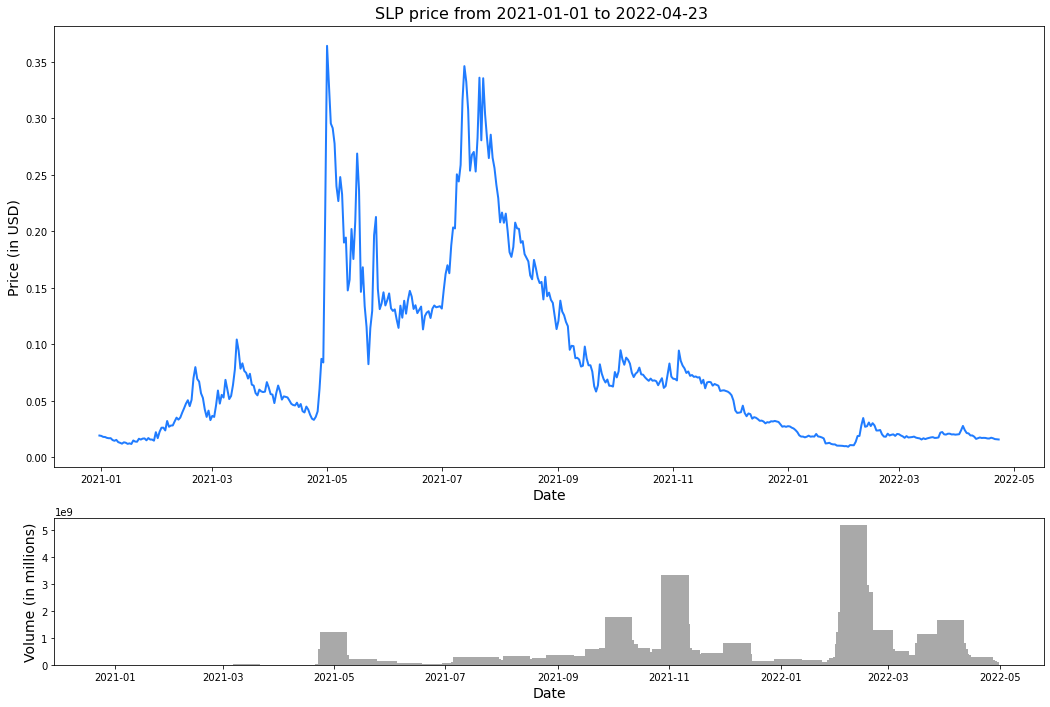

In [22]:
get_charts(SLP, 'SLP price from {0} to {1}'.format(start.date(), end.date()))

When the coin keep generated from the game and doesn't have enough merchanism to burn the coin. The price will go down. Hence, the supply unlimit have this disadvantages which is one of the area that Decentraland may happened. 

Another good example occurred on November 25, 2011, when the volatility of the coin ETERNAL, which is used in the game CryptoMines, dropped sharply from USD801 to around USD5 in two days before gradually recovering to USD95. As a result of the event, players were scared by the price drop and withdrew all the rewards, effectively rendering the accumulated coins worthless due to a lack of liquidity to supply the reward. Despite the company's announcement that it would launch a new game on a new platform, the cryptocurrency ETERNAL became useless. As a result, liquidity within the circulating supply is critical. If there is no remaining liquidity, like in the case of ETERNAL, your coin will be worthless.


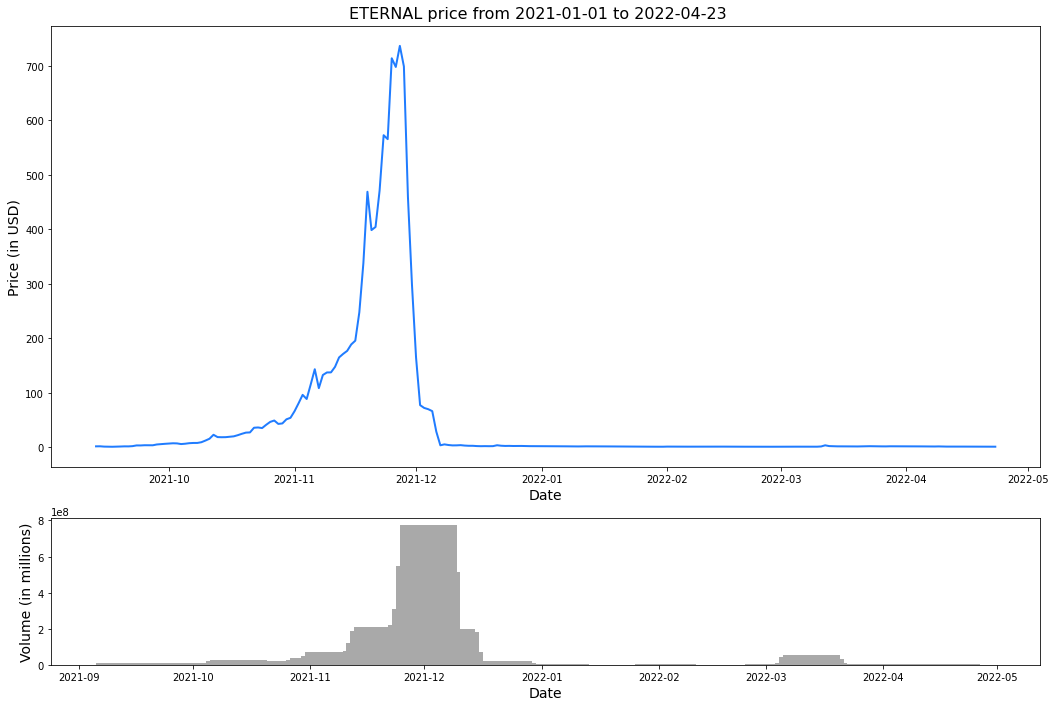

In [23]:
#ETERNAL-USD
ETERNAL = web.DataReader('ETERNAL-USD','yahoo', start, end)
ETERNAL = ETERNAL.reset_index()
get_charts(ETERNAL, 'ETERNAL price from {0} to {1}'.format(start.date(), end.date()))

### Hence, the top 5 identify Metaverse's coin are Decentraland, The Sandbox, Theta Network, Axie Infinity and Stacks. We can't use APECoin as the date added in the market is too new. ApeCoin only available for less than 50days. While other coins is more than 470days. 50days is not enough to use it for futher analysis in RQ2 & 3.